<a href="https://colab.research.google.com/github/vidjaydas/DS_Assignments/blob/main/K_Means_Cluster_Assignment_Crime_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Performing K-Means clustering method on Crime data set

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('/content/crime_data.csv')

In [4]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
data.shape

(50, 5)

In [7]:
data.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [8]:
#Normalizatio function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data_df = scaler.fit_transform(data.iloc[:,1:])

In [9]:
scaled_data_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [10]:
#How to find optimum number of cluster
# The K-Means algorithm aims to choose centroids that minimise the inertia, of (WCSS) within-cluster sum of-squared criterior

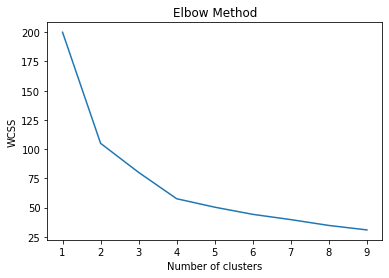

In [15]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_data_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


K = 4 is the good value to be considered

In [16]:
#Build cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_data_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [17]:
clusters_new.labels_

array([0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 3,
       2, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1], dtype=int32)

In [18]:
#Assign clusters to the data set
data['Clusterid_new'] = clusters_new.labels_

In [20]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusterid_new
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,3


In [22]:
data.groupby('Clusterid_new').agg(['mean']).reset_index()

,Clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,13.937500,243.625000,53.750000,21.412500
1,1,5.656250,138.875000,73.875000,18.781250
2,2,3.600000,78.538462,52.076923,12.176923
3,3,10.815385,257.384615,76.000000,33.192308


##Observation : 
####1) average of murder is more in cluster 0
####2) average of Assault is more in cluster 3
####3) average of Urbanpop is more in cluster 3
####4) average of rape is more in cluster 3

##Conclusion :
####Cluster 3 has more number of Assault, UrbanPop and Rape